###Lecture3_Exercises

**Economics dataset analysis**

The folder economics (~/DSE200/DSE200/data/economics/) has a set of small datasets corresponding to different economics topics. We will use Pandas to incorporate these datasets into our workflow, merge them and analyze the economic trends as a function of time.

To achieve this, do the following

1. Read each of the csv files iteratively
2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes and the values are the Series from each downloaded file
3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]
4. Process the data
5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences


#### <font color = 'blue'> Inference from the graphs:</font>
#### <font color = 'blue'> The graphs clearly show the relationship among Unemployment rate, Industrial production and GDP growth.</font>
#### <font color = 'blue'> An increase in Unemployment impacts the growth in industrial production and GDP growth.</font>
#### <font color = 'blue'> Hence, maintaining a good industrial production and employment rate are crucial to maintain GDP growth.</font>

6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' in a mmatrix form with kernel density plots along the diagonals.

Note: Processing the data is of utmost importance for better readability and understanding of the data. Process the above data by ensuring the following

1. dropping the rows with null values
2. Output data regularly to see if they are following regular format. Use pandas.series.pct_change wherever necessary

**The codes and their corresponding series representation**

                            Series                   Code           Frequency
                            Real GDP                 GDPC1          Quarterly
                            Industrial Production   INDPRO          Quarterly
                            Core CPI               CPILFESL         Monthly
                            Unemployment Rate       UNRATE          Monthly
                            10 Year Yield            GS10           Monthly
                            1 Year Yield             GS1            Monthly
                            Baa Yield                BAA            Monthly
                            Aaa Yield                AAA            Monthly
                            
** Variable Description **

                            Series                        Description
                            Treated                       Dummy indicating whether the candidate received the treatment
                            Age                           Age in years
                            Education (years)             Years of Education
                            Black                         Dummy indicating African-American
                            Hispanic                      Dummy indicating Hispanic
                            Married                       Dummy indicating married
                            Real income Before ($)        Income before program
                        Real income After ($)         Income after program           


In [141]:
# Import all the required packages

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [142]:
# Change directory to data location
%cd ~/Documents/DSE/dmysoren/DSE200/data/economics

/Users/Deepthi/Documents/DSE/dmysoren/DSE200/data/economics


In [143]:
## 1. Read each of the csv files iteratively

# Get a list of files in the current directory
files = !ls

# Create an empty dict
data = {}

# Iterate through the file names and read into the dictionary 'data'
for filename in files:
    code = filename.replace('.csv','')
    data[code] = pd.read_csv(filename)


In [144]:
## 2. Merge all of the data into a single dataframe by building a dictionary where the keys are the codes 
## and the values are the Series from each downloaded file

# Create an empty dict to create indexed dataframes
data_indexed = {}

# Create index on 'DATE'
for key,value in data.iteritems():
    data_indexed[key] = data[key].set_index('DATE')

# Create merged_data with all the value columns and 'DATE' from all the datasets
merged_data = pd.concat(data_indexed, axis = 1)


In [145]:
## 3. Construct the Term and Default premia series using basic math on the series, and mmerge the resulting series using JOIN operation. 
## HINT: term_premium = merged_data[’GS10’] - merged_data[’GS1’] and default_premium = merged_data[’BAA’] - merged_data[’AAA’]

term_premium = merged_data['GS10'] - merged_data['GS1'] 
default_premium = merged_data['BAA'] - merged_data['AAA']

term_premium.rename(columns = {'VALUE':'term_premium'}, inplace = True)
default_premium.rename(columns = {'VALUE':'default_premium'}, inplace = True)

merged_data2 = (merged_data.join(term_premium)).join(default_premium)


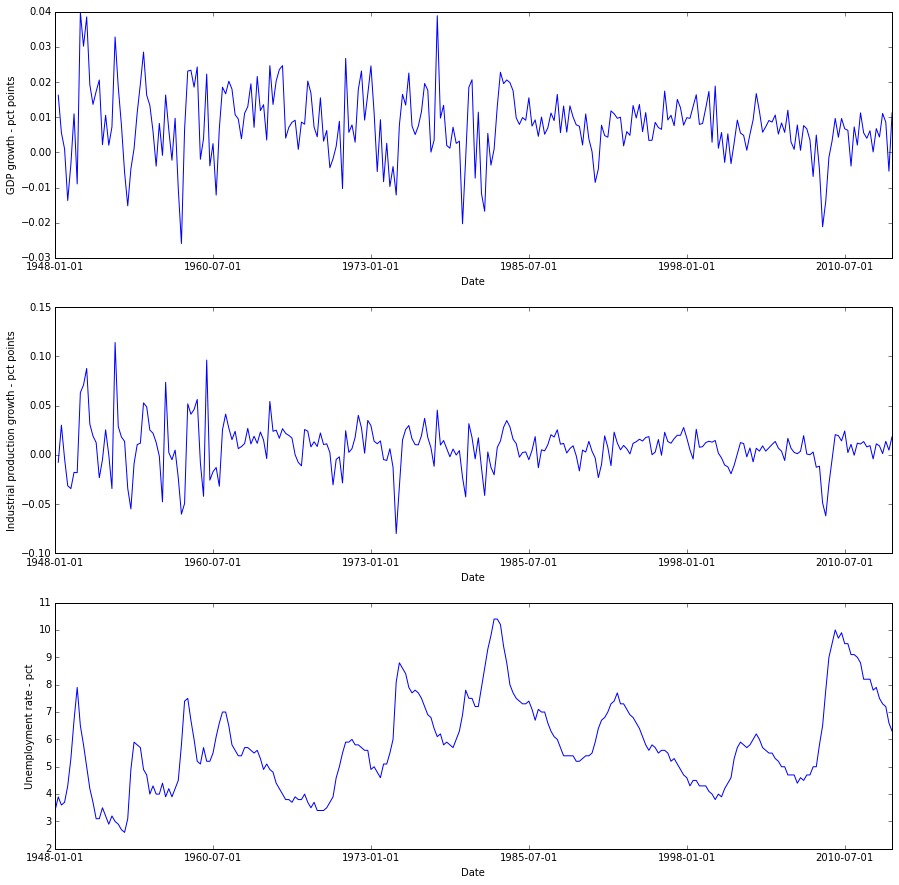

In [146]:
## 4. Process the data
## - dropping the rows with null values
##- Output data regularly to see if they are following regular format. Use pandas.series.pct_change wherever necessary

# Drop unnecessary columns and created a new data set
merged_data3 = merged_data.drop(['AAA','BAA','GS10','GS1','CPILFESL'],axis=1)

# Create a quarterly dataset by dropping NaN 
# (Although UNRATE is at a monthly level, for the purposes of analysis, only first month of the quarter is used)
qrtly = merged_data3.dropna()

# NOTE: INDRPRO is said to be quarterly data in the description (although data is populated at monthly level)
# So Assuming that beginning of the quarter has the correct read the following approach is taken

sel_col = ['GDPC1','INDPRO']
growth_rates = qrtly[sel_col].pct_change()

# Create a final dataset with necessary columns which can be used to plot
to_plot = qrtly.drop(growth_rates, axis=1).join(growth_rates)


## 5. Plot ’GDP_growth’,’IP_growth’ and 'Unemp_rate' a a function of time and draw inferences

fig, axs = plt.subplots(3,1)

(to_plot[('GDPC1','VALUE')]).plot(ax = axs[0], figsize = (15,15))
axs[0].set_ylabel('GDP growth - pct points')
axs[0].set_xlabel('Date')

(to_plot[('INDPRO','VALUE')]).plot(ax = axs[1], y = 'indpro_growth')
axs[1].set_ylabel('Industrial production growth - pct points')
axs[1].set_xlabel('Date')

to_plot[('UNRATE','VALUE')].plot(ax = axs[2], y = 'unemp_rate')
axs[2].set_ylabel('Unemployment rate - pct')
axs[2].set_xlabel('Date')


### Inference from the graphs:
### The graphs clearly show the relationship among Unemployment rate, Industrial production and GDP growth.
### An increase in Unemployment impacts the growth in industrial production and GDP growth.
### Hence, maintaining a good industrial production and employment rate are crucial to maintain GDP growth.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125117490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1294e7710>]], dtype=object)

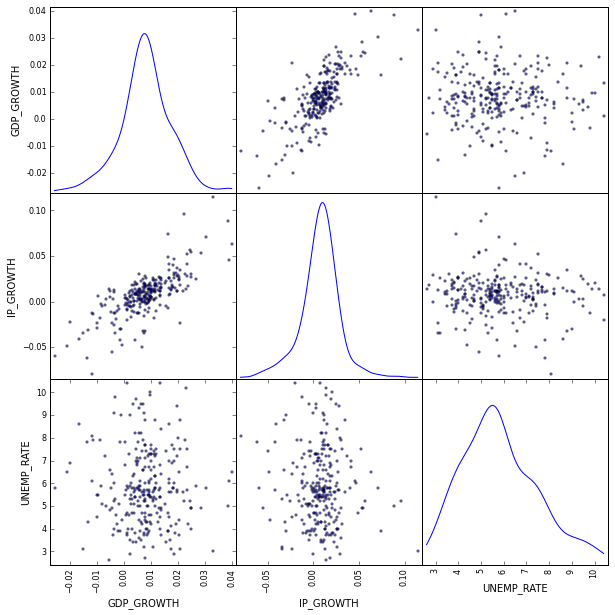

In [382]:
## 6. Use pandas function scatter_matrix to generate scatter plots of ’GDP_growth’,’IP_growth’ and 'Unemp_rate' 
## in a mmatrix form with kernel density plots along the diagonals.


df = pd.DataFrame({'GDP_GROWTH':to_plot[('GDPC1','VALUE')],'IP_GROWTH':to_plot[('INDPRO','VALUE')],'UNEMP_RATE':to_plot[('UNRATE','VALUE')]})

pd.scatter_matrix(df, diagonal='kde', figsize = (10,10))



**Nutrition dataset analysis**

Download the dataset from http://ashleyw.co.uk/files/foods-2011-10-03.json.zip
This data set is a compilation of data provided by the US department of Agriculture. The data set contains data for 6,636 unique foods and 94 unique nutrients (with an average of 56.5 nutrients per food)

Do the following

Use the built in python json module to load the food data into a python list

Your code should look like this

> import json
> db = json.load(open('foods-2011-10-03.json'))

db will be a list of 6636 python dictionaries, each containing nutritional information for a different food item. Each dictionary will have the following keys:

    1.portions
    2.description
    3.tags
    4.nutrients
    5.group
    6.id
    7.manufacture

Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)

Finally, use the pandas combining techniques to create a nutrients DataFrame. After you have done this drop duplicate entries in this DataFrame. For example, if you had named the objects nuts you would do

nuts = nuts.drop_duplicates()

Use the rename method to make sure that the description and group columns are un-ambiguous for both the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every food has a description and group and each nutrient also has those identifiers). 

Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional information. Make sure to do an outer style merge on the correct columns.

Using the foods DataFrame you have been building, compute the following things:

1. The food item with the highest content of each nutrient.
2. A function that accepts a nutrient name and a quantile value and generates a horizontal bar plot of the amount of that nutrient in each food group. Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work. 

In [6]:
# %cd DSE200/data
# % cd ..
! pwd

/Users/Deepthi/Documents/DSE/dmysoren/DSE200/data
/Users/Deepthi/Documents/DSE/dmysoren/DSE200/data


In [7]:
## Use the built in python json module to load the food data into a python list

import json 
db = json.load(open('foods-2011-10-03.json'))

In [10]:
## Now, create a DataFrame of meta_data using the description, group, id, and manufacturer items in each dictionary.

col_name = ['description', 'group', 'id', 'manufacturer']
meta_data = pd.DataFrame(db, columns=col_name)

meta_data.head(5)

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [11]:
## Loop over db and construct a list of DataFrames containing the nutritional information for each record in db. 
## Make sure to add a column to each of these DataFrames that contains the unique food id (id key in the dictionary)


get_list = []

for rec in db:
    temp = pd.DataFrame(rec['nutrients'])
    temp['id'] = rec['id']
    get_list.append(temp)

# print get_list[1]


In [12]:
## Finally, use the pandas combining techniques to create a nutrients DataFrame. 
## After you have done this drop duplicate entries in this DataFrame. 


## Using 'concat' to create nutrients DataFrame
nutrients=pd.concat(get_list)

## Drop duplicate entries
nutrients.drop_duplicates(inplace = True)



## Use the rename method to make sure that the description and group columns are un-ambiguous for both  
## the meta_data DataFrame and the nutrients DataFrame (These column names are duplicated because every 
## food has a description and group and each nutrient also has those identifiers).

# Rename columns to avoide ambiguity
meta_data.rename(columns = {'description':'food_description'}, inplace = True)
meta_data.rename(columns = {'group':'food_group'}, inplace = True)

print meta_data.head(5)

nutrients.rename(columns = {'description':'comp_description'}, inplace = True)
nutrients.rename(columns = {'group':'comp_group'}, inplace = True)

print nutrients.head(5)




                     food_description              food_group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4               
              comp_description   comp_group units   value    id
0                      Protein  Composition     g   25.18  1008
1            Total lipid (fat)  Composition     g   29.20  1008
2  Carbohydrate, by difference  Composition     g    3.06  1008
3                          Ash        Other     g    3.28  1008
4                       Energy       Energy  kcal  376.00  1008


In [13]:
#Finally, use the data combining routines to come up with a foods DataFrame containing all the meta_data and nutritional 
#information. Make sure to do an outer style merge on the correct columns.

foods = pd.merge(nutrients, meta_data, left_on='id', right_on='id', how='outer')


In [17]:
# Using the foods DataFrame you have been building, compute the following things:
# 1. The food item with the highest content of each nutrient.

high_nutr = foods[['food_description','comp_description', 'value' ]].groupby('comp_description').max()

# Displaying 15 rows only just to keep the notebook smaller
high_nutr.reset_index().head(15)




,comp_description,food_description,value
0,Adjusted Protein,"Mushrooms, white, raw",12.900
1,Alanine,"Yogurt, vanilla, low fat, 11 grams protein per...",8.009
2,"Alcohol, ethyl","Yogurt, vanilla, low fat, 11 grams protein per...",42.500
3,Arginine,"Yogurt, vanilla, low fat, 11 grams protein per...",7.436
4,Ash,"Yogurt, vanilla, low fat, 11 grams protein per...",72.500
5,Aspartic acid,"Yogurt, vanilla, low fat, 11 grams protein per...",10.203
6,Beta-sitosterol,"T.G.I. FRIDAY'S, French fries",426.000
7,Betaine,"Yogurt, fruit variety, nonfat, fortified with ...",630.400
8,Caffeine,"Yogurt, vanilla, low fat, 11 grams protein per...",3680.000
9,"Calcium, Ca","Yogurt, vanilla, low fat, 11 grams protein per...",7364.000


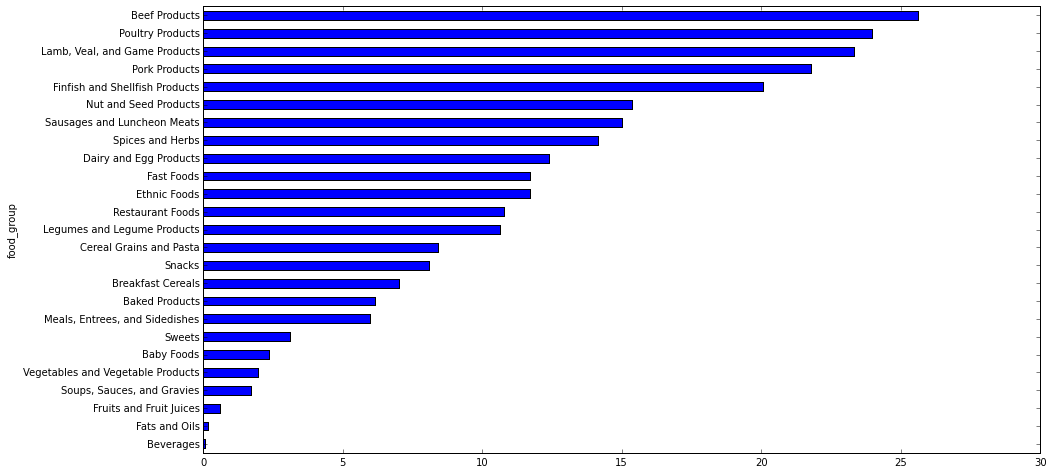

In [147]:
# 2. A function that accepts a nutrient name and a quantile value and generates 
# a horizontal bar plot of the amount of that nutrient in each food group. 
# Provide a plot title. HINT: You will need to use the quantile and sort (or order ) methods in order for this to work.


def nut_quant(nut,quant):
    quant = foods.groupby(['comp_description', 'food_group'])['value'].quantile(quant)
    quant[nut].order().plot(kind='barh', figsize = (15,8))


# Input a nutrient Eg: Water, Protein, Vitamin D and a quantile - a number less than 1
nut_quant('Protein',0.5)



**Classifying Digits**
SKLearn has many intereting datasets pre-loaded in it, one of which is load_digits (sklearn.datasets.load_digits - http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Load_digits is a dataset of digits, with each datapoint being a 8x8 image of a digit. 

You can load this dataset as follows

In [18]:
from sklearn.datasets import load_digits
digits = load_digits()

And the images can be visualized as follows

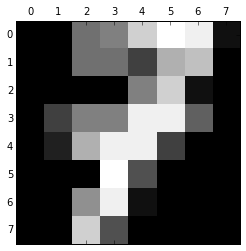

In [19]:
import pylab as pl 
pl.gray() 
pl.matshow(digits.images[7]) 
pl.show() 

1. Visualize the first 15 digits to get a better understanding of the data
2. With x as data and y as target, classify the above datasets into individual targets using a decision tree
3. Perform this classification task with sklearn.svm.SVC. How does the choice of kernel affect the results?
4. Perform this classification task with sklearn.ensemble.RandomForestClassifier. Write in the markdown below the impact each of the parammeter had on the result


### <font color = 'blue'> Impact of each parameter on the result </font>

#### <font color = 'blue'> 1. max_depth: max_depth defines the  maximum depth of the tree. After several iterations, max_depth = 22 is found to work the best with an f1_score of nearly 0.98 </font>
#### <font color = 'blue'> 2. max_features: max_features is the number of features to consider while looking for best fit. In this case, default value of sqrt(n_features) was found to provide better results </font>
#### <font color = 'blue'> 3. n_estimators: n_estimators defines the number of trees in the forest. The default is 10. However, n_estimators = 35 was found give best results with an f1_score of 0.98 </font>


Try a few sets of parameters for each model and check the F1 score (sklearn.metrics.f1_score) on your results. Output the best F1 score that you achieve. 



#### <font color = 'blue'> In the models below, I have iterated several values for each of the model and cosolidated the results here:</font>

#### <font color = 'blue'> 1. Decision Tree Classifier: tried modifying a few parameters like max_featuers and max_depth. But by changing the criterion to 'entropy' from default 'gini' I was able to achieve an f1 score of 0.91</font>

#### <font color = 'blue'> 2. SVM.SVC: tried several values for gamma and C. But found that gamma = 0.001 and C = 1.0 give the best f1 score of 0.98</font>

#### <font color = 'blue'> 3. Random Forest Classifier: iterated through several values for max_depth, max_features and n_estimators and obtained best results with the following parameters: max_depth = 22, max_features = default, n_estimators = 35 with an f1 score of 0.98</font>


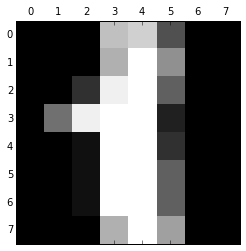

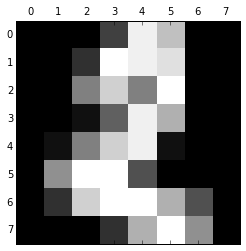

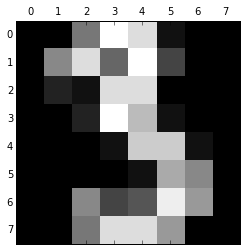

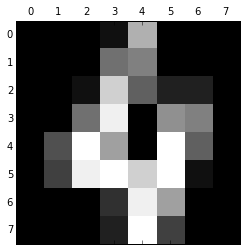

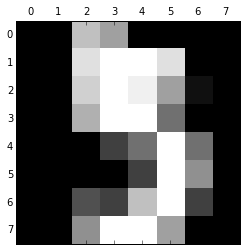

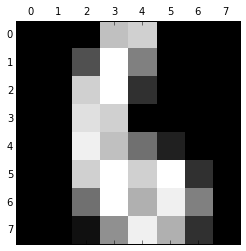

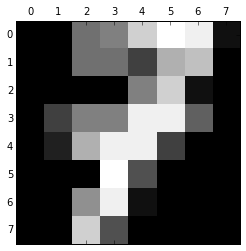

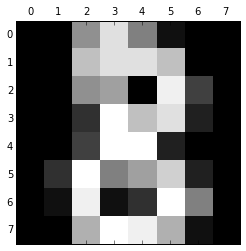

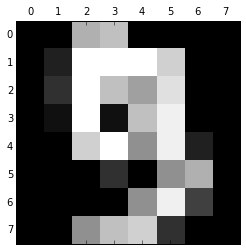

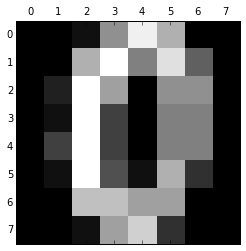

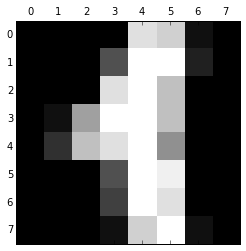

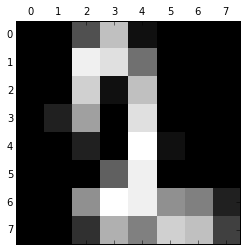

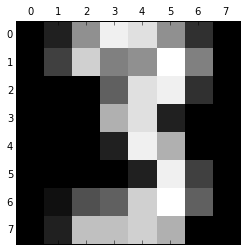

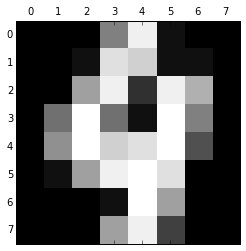

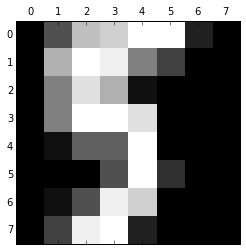

In [20]:
# 1. Visualize the first 15 digits to get a better understanding of the data

for i in range(1,16):
    pl.matshow(digits.images[i]) 
    pl.show() 

In [47]:
# 2. With x as data and y as target, classify the above datasets into individual targets using a decision tree


from sklearn.cross_validation import train_test_split
X, test_X, Y, test_Y = train_test_split(digits.data,digits.target, test_size=0.25, random_state=4)


In [83]:
from sklearn import tree,metrics
import random

# Number of images
n = len(digits.images)


# Create the decision tree classifier
clf = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 200) ## Fixed random_state = 200 to get consistent result on every run
clf = clf.fit(X,Y)

# Pictorially represent the decision tree
from sklearn.externals.six import StringIO
with open('digits.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)       
import os
os.unlink('digits.dot')
from sklearn.externals.six import StringIO  
from IPython.display import Image 
import pydot
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf('digits.pdf') # Decision tree is exported into digits.pdf dataset
 
# Test the fit on the training data
predicted = clf.predict(X)
print 'Score for training data =', clf.score(X,Y)

# Test the model on the test data
predicted2 = clf.predict(test_X)
expected2 = digits.target[test_Y]

print 'Score for test data =', clf.score(test_X,test_Y)

d = {'predicted':predicted2, 'expected': expected2}

df = pd.DataFrame(data=d)

f1score = metrics.f1_score(expected2, predicted2, average = 'weighted')
print 'f1 score =' , f1score

print 'Sample of data which could not be matched'
df[df.predicted != df.expected].head(10)




Score for training data = 1.0
Score for test data = 0.911111111111
f1 score = 0.911539159804
Sample of data which could not be matched


,expected,predicted
0,6,8
9,8,7
20,9,7
22,8,5
33,1,7
38,1,5
43,3,5
44,2,8
64,1,3
71,4,5


In [58]:
# 3. Perform this classification task with sklearn.svm.SVC. 
# Choice of kernel question is addressed later

## In this section, I am just looking at the results from the default inputs.
## The results with default parameters is very poor with a score less than 0.5. 
## So I have tweaked the parameters in the next section.


import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

# Number of images
n = len(digits.images)

# Convert the image matrix into a flatter matrix
digit_dat = digits.images.reshape(n, -1)

# Create the classifier
classify = svm.SVC()

# Split the data into two portions 1. Learn 2. Predict
# 1. Use the fit function on the first half of the data - Learn
predicted = classify.fit(X,Y)
print 'Score for training data with default parameters =', classify.score(X,Y), '\n'
 
# 2. Use the predict function on the second half of the data to predict
expected2 = test_Y
predicted2 = classify.predict(test_X)
print 'Score for test data with default parameters =', classify.score(test_X,test_Y), '\n'


print("Classification report %s:\n%s\n" % (classify, metrics.classification_report(expected2, predicted2)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected2, predicted2))


Score for training data with default parameters = 1.0 

Score for test data with default parameters = 0.484444444444 

Classification report SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.40      0.57        48
          1       1.00      0.72      0.84        39
          2       1.00      0.35      0.52        48
          3       0.16      1.00      0.27        43
          4       1.00      0.67      0.80        42
          5       1.00      0.37      0.54        49
          6       1.00      0.72      0.84        39
          7       1.00      0.39      0.56        49
          8       1.00      0.14      0.24        43
          9       1.00      0.24      0.39        50

avg / total       0.92      0.48      0.55       450


Confusion matrix:
[[19  0  0 

In [62]:
## In this section, I tweaked the parameters gamma and C to obtain better results 
## with the kernel choice of 'rbf' (which is the default)

## gamma = 0.001 and C=1.0 have given the best results

import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
digits = datasets.load_digits()

# Number of images
n = len(digits.images)

# Convert the image matrix into a flatter matrix
digit_dat = digits.images.reshape(n, -1)

# Create the classifier
classify = svm.SVC(gamma=0.001, C=1.0)

# Split the data into two portions 1. Learn 2. Predict
# 1. Use the fit function on the first half of the data - Learn
predicted = classify.fit(X, Y)
print 'Score for training data with gamma = 0.001 and C = 1.0 =', classify.score(digits.data[:3*n/4],digits.target[:3*n/4]), '\n'
 
# 2. Use the predict function on the second half of the data to predict
expected2 = test_Y
predicted2 = classify.predict(test_X)
print 'Score for test data with default parameters gamma = 0.001 and C = 1.0 =', classify.score(test_X,test_Y), '\n'


print("Classification report %s:\n%s\n" % (classify, metrics.classification_report(expected2, predicted2)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected2, predicted2))



Score for training data with gamma = 0.001 and C = 1.0 = 0.997772828508 

Score for test data with default parameters gamma = 0.001 and C = 1.0 = 0.988888888889 

Classification report SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        48
          1       0.95      1.00      0.97        39
          2       1.00      1.00      1.00        48
          3       0.98      1.00      0.99        43
          4       1.00      1.00      1.00        42
          5       1.00      0.98      0.99        49
          6       1.00      0.97      0.99        39
          7       1.00      1.00      1.00        49
          8       0.98      0.95      0.96        43
          9       0.98      0.98      0.98        50

avg / total       0.99      0.99      

Metrics for comparision for several kernel options 
    kernel  rsq_score      time
0      rbf   0.988889  0.102421
1     poly   0.986667  0.047361
2   linear   0.980000  0.039336
3  sigmoid   0.700000  0.315880


array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d0ee350>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x124b30990>], dtype=object)

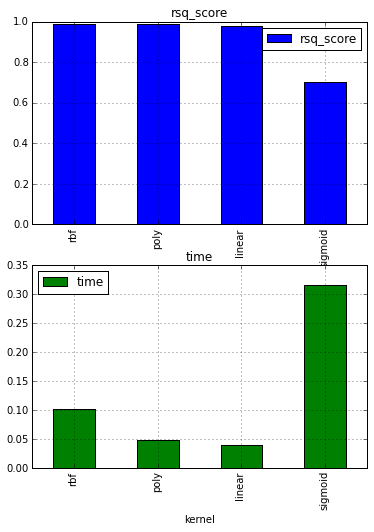

In [63]:
# How does the choice of kernel affect the results?

# Since we found that gamma = 0.001 and C = 1 provides the best results, I am assuming these values for the parameters
# to understand the impact of kernel


# Answer: The choice of kernel impacts the precision of the classifier by modifying the shape of the boundary. 
# I ran the following options of Kernels and obtained the metrics as follows
#     kernel  rsq_score      time
# 0      rbf   0.988889  0.110145
# 1     poly   0.986667  0.046837
# 2   linear   0.980000  0.039517
# 3  sigmoid   0.700000  0.317273
# Kernel choice 'rbs' seems to provide the best RSquare and precision and comparatively lower time of exection.
# The performance of 'rbs' is followed by the kernel choice 'poly' with RSquare and precision similar to that of 'rbf'
# but with a slightly smaller run time.


import time
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics


def iter_svc(k):
    digits = datasets.load_digits()
    n = len(digits.images)
    # Convert the image matrix into a flatter matrix
    digit_dat = digits.images.reshape(n, -1)
    t1=time.time()
    # Create the classifier
    classify = svm.SVC(kernel=k, gamma = 0.001, C = 1.0)
    # Split the data into two portions 1. Learn 2. Predict
    # Use the fit function on the first half of the data - Learn
    classify.fit(X, Y)
    # Use the predict function on the second half of the data to predict
    expected = test_Y
    predicted = classify.predict(test_X)
    t2=time.time()
    rsq=classify.score(test_X,test_Y)
    tme=t2-t1
    # Used the folowing commented print statements to get the f1 score and precision
#     print("Classification report %s:\n%s\n" % (classify, metrics.classification_report(expected, predicted)))
    return  k, tme, rsq
    
k1, tme1, rsq1 = iter_svc('rbf')
k2, tme2, rsq2 = iter_svc('poly')
k3, tme3, rsq3 = iter_svc('linear')
k4, tme4, rsq4 = iter_svc('sigmoid')

k_f = [k1,k2,k3,k4]
tme_f = [tme1,tme2,tme3,tme4]
rsq_f = [rsq1,rsq2,rsq3,rsq4]

d = {'kernel':k_f, 'time': tme_f, 'rsq_score': rsq_f}

df = pd.DataFrame(data=d)

print 'Metrics for comparision for several kernel options', '\n', df

# Plotting a bar graph of Rsquare value and time taken using each choice of kernel
df.plot(kind = 'bar', x = 'kernel', grid = True, subplots = True, sharex = False, figsize=(6,8))



In [53]:
# 4.  Perform this classification task with sklearn.ensemble.RandomForestClassifier. 
# Write in the markdown below the impact each of the parammeter had on the result
#     1. max_depth: 
#     2. max_features:
#     3. n_estimators:


## In this section I am iterating to select the seed with best f1_score with default parameters.

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()
import numpy as np
import pandas as pd

n = len(digits.images)

# Convert the image matrix into a flatter matrix
digit_dat = digits.images.reshape(n, -1)

sd1=[]
f1score1 = []

from sklearn.cross_validation import train_test_split
features_train, features_test, targets_train, targets_test = train_test_split(digits.data,digits.target, test_size=0.25, random_state=4)

for sd in range(15000):
    random.seed(sd)
    # Create the classifier
    classify = RandomForestClassifier()
    # Split the data into two portions 1. Learn 2. Predict
    # Use the fit function on the first half of the data - Learn
    classify.fit(features_train, targets_train)
    # Use the predict function on the second half of the data to predict
    expected = targets_test
    predicted = classify.predict(features_test)
    f1score = metrics.f1_score(expected, predicted, average = 'weighted')
    sd1.append(sd)
    f1score1.append(f1score)

    
d = {'seeds':sd1, 'f1score': f1score1}

df = pd.DataFrame(data=d)


# Print top 5 f1score with best f1score
df.sort('f1score' , ascending = 0).head(5)
    


,f1score,seeds
2557,0.982170,2557
5378,0.980002,5378
2763,0.977943,2763
10256,0.977864,10256
11233,0.977816,11233


In [64]:
# Check the preformance with default metrics

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()

n = len(digits.images)

# Convert the image matrix into a flatter matrix
digit_dat = digits.images.reshape(n, -1)

random.seed(2557)

# Create the classifier
classify = RandomForestClassifier()

# Split the data into two portions 1. Learn 2. Predict
# Use the fit function on the first half of the data - Learn
classify.fit(features_train, targets_train)
 
# Use the predict function on the second half of the data to predict
expected = targets_test
predicted = classify.predict(features_test)


f1score = metrics.f1_score(expected, predicted, average = 'weighted')

print "F1 score with default parameters = ", f1score, '\n'
print("Classification report %s:\n%s\n" % (classify, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))


F1 score with default parameters =  0.95751081002 

Classification report RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        48
          1       0.86      0.97      0.92        39
          2       1.00      0.98      0.99        48
          3       0.93      0.98      0.95        43
          4       0.98      0.98      0.98        42
          5       0.96      0.98      0.97        49
          6       1.00      0.97      0.99        39
          7       0.94      1.00      0.97        49
          8       0.97      0.86      0.91        43
          9       0.93      0.86     

Populating the interactive namespace from numpy and matplotlib


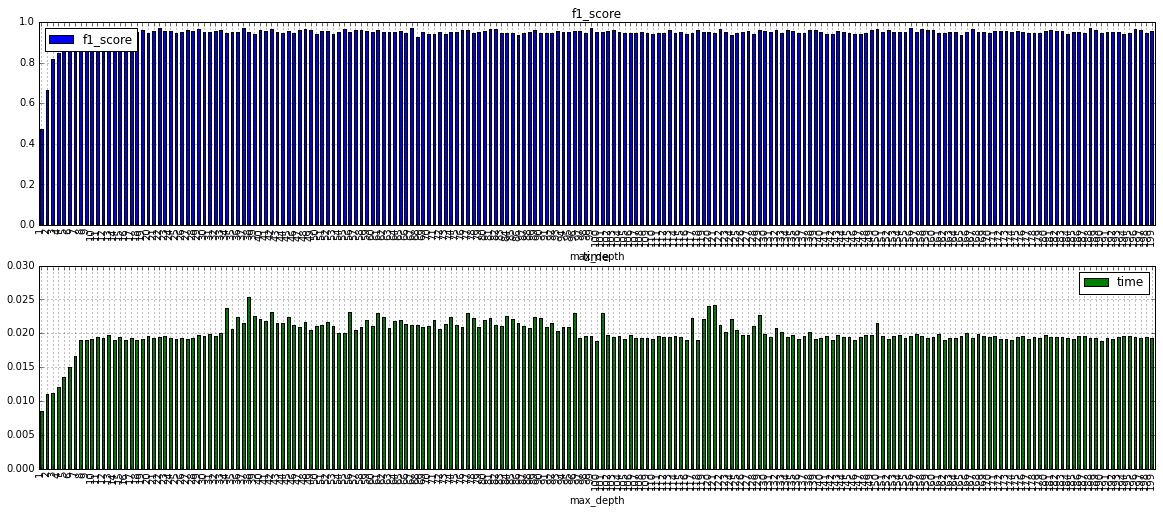

     f1_score  max_depth      time
21   0.971346         22  0.019372
98   0.971188         99  0.019606
187  0.971166        188  0.019240
66   0.969040         67  0.021237
155  0.968897        156  0.019526


In [69]:
## To understand the impact of max_depth

import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%pylab inline

md1 = []
tme1 = []
f1score1 = []

random.seed(2557)

for md in range(1,200):
    n = len(digits.images)
    t1=time.time()
    # Create the classifier
    classify = RandomForestClassifier(max_depth = md)
    # Split the data into two portions 1. Learn 2. Predict
    # Use the fit function on the first half of the data - Learn
    classify.fit(features_train, targets_train)
    # Use the predict function on the second half of the data to predict
    expected = targets_test
    predicted = classify.predict(features_test)
    t2=time.time()
    f1score = metrics.f1_score(expected, predicted, average = 'weighted')
    tme=t2-t1
    md1.append(md)
    tme1.append(tme)
    f1score1.append(f1score)


d = {'max_depth':md1, 'time': tme1, 'f1_score': f1score1}

df = pd.DataFrame(data=d)

# Plotting a bar graph of Rsquare value and time taken using each choice of kernel
df.plot(kind = 'bar', x = 'max_depth', grid = True, subplots = True, sharex = False, figsize=(20,8))

plt.show()

print df.sort(['f1_score'],ascending = 0).head(5)

## max_depth = 22 gives the best results in this case


Populating the interactive namespace from numpy and matplotlib


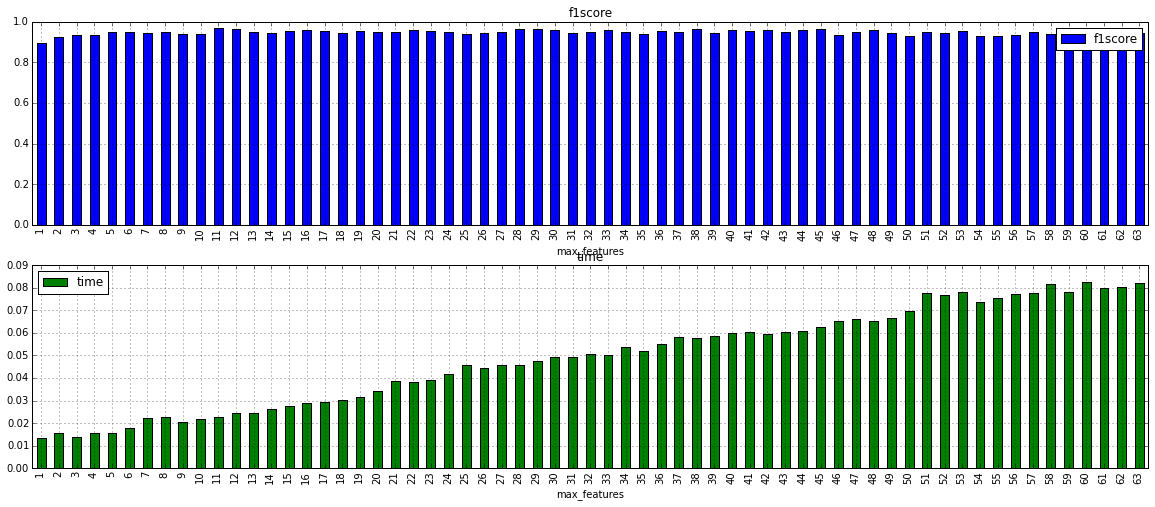

     f1score  max_features      time
10  0.968989            11  0.022674
28  0.966943            29  0.047340
27  0.966477            28  0.045873
44  0.964807            45  0.062724
11  0.964498            12  0.024334


In [72]:
## To understand the impact of max_features

## As per the learning from the previous step, keeping the max_depth=22 to ensure good fit

import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%pylab inline

mf1 = []
tme1 = []
f1score1 = []

# max_f = ["sqrt", "log2" ]

max_f = range(1,64)

random.seed(2557)

for mf in max_f:
    n = len(digits.images)
    # Convert the image matrix into a flatter matrix
    digit_dat = digits.images.reshape(n, -1)
    t1=time.time()
    # Create the classifier
    classify = RandomForestClassifier(max_depth = 22, max_features = mf)
    # Split the data into two portions 1. Learn 2. Predict
    # Use the fit function on the first half of the data - Learn
    classify.fit(features_train, targets_train)
    # Use the predict function on the second half of the data to predict
    expected = targets_test
    predicted = classify.predict(features_test)
    t2=time.time()
    f1score = metrics.f1_score(expected, predicted, average = 'weighted')
    tme=t2-t1
    mf1.append(mf)
    tme1.append(tme)
    f1score1.append(f1score)


d = {'max_features':mf1, 'time': tme1, 'f1score': f1score1}

df = pd.DataFrame(data=d)

# Plotting a bar graph of Rsquare value and time taken using each choice of kernel
df.plot(kind = 'bar', x = 'max_features', grid = True, subplots = True, sharex = False, figsize=(20,8))

plt.show()

# Find the max f1 score
print df.sort(['f1score'],ascending = 0).head(5)

## max_features = auto is the best option in this case. No other option is making any positive impact on the data

Populating the interactive namespace from numpy and matplotlib


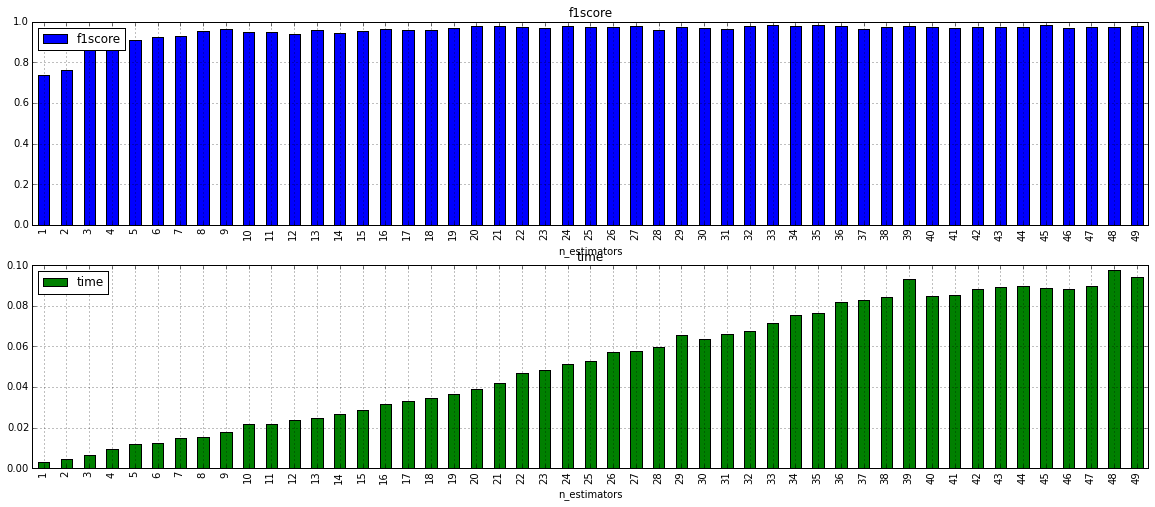

     f1score  n_estimators      time
34  0.984413            35  0.076446
32  0.982310            33  0.071691
44  0.982279            45  0.088865
48  0.980062            49  0.094438
38  0.980036            39  0.093275


In [73]:
## To understand the impact of n_estimators

## As per the above two steps, assigning the corresponding values:  max_depth = 22 and max_features = auto

import time
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
%pylab inline

ne1 = []
tme1 = []
f1score1 = []

random.seed(2557)

for ne in range(1,50):
    n = len(digits.images)
    # Convert the image matrix into a flatter matrix
    digit_dat = digits.images.reshape(n, -1)
    t1=time.time()
    # Create the classifier
    classify = RandomForestClassifier(max_depth = 22, n_estimators = ne )
    # Split the data into two portions 1. Learn 2. Predict
    # Use the fit function on the first half of the data - Learn
    classify.fit(features_train, targets_train)
    # Use the predict function on the second half of the data to predict
    expected = targets_test
    predicted = classify.predict(features_test)
    t2=time.time()
    f1score = metrics.f1_score(expected, predicted, average = 'weighted')
    tme=t2-t1
    ne1.append(ne)
    tme1.append(tme)
    f1score1.append(f1score)


d = {'n_estimators':ne1, 'time': tme1, 'f1score': f1score1}

df = pd.DataFrame(data=d)

# Plotting a bar graph of Rsquare value and time taken using each choice of kernel
df.plot(kind = 'bar', x = 'n_estimators', grid = True, subplots = True, sharex = False, figsize=(20,8))

plt.show()

# Find the max f1 score
print df.sort('f1score' , ascending = 0).head(5)

## n_estimators = 35 slightly improves the f1_score

In [78]:
# Rerun the RandomForest classifier with the following selected parameters 
#     1. max_depth: 22
#     2. max_features: default
#     3. n_estimators: 35


import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
digits = datasets.load_digits()

n = len(digits.images)

# Convert the image matrix into a flatter matrix
digit_dat = digits.images.reshape(n, -1)

random.seed(2557)

# Create the classifier
classify = RandomForestClassifier(max_depth = 22, n_estimators = 35)


# Split the data into two portions 1. Learn 2. Predict
# Use the fit function on the first half of the data - Learn
classify.fit(features_train, targets_train)
# Use the predict function on the second half of the data to predict
expected = targets_test
predicted = classify.predict(features_test)


f1score = metrics.f1_score(expected, predicted, average = 'weighted')

print 'The best f1 score for the decision tree using random forest calssifier is' ,f1score , '\n'

print("Classification report %s:\n%s\n" % (classify, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))


The best f1 score for the decision tree using random forest calssifier is 0.975491949722 

Classification report RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        48
          1       0.91      1.00      0.95        39
          2       1.00      1.00      1.00        48
          3       0.95      0.98      0.97        43
          4       0.98      1.00      0.99        42
          5       1.00      0.98      0.99        49
          6       1.00      0.97      0.99        39
          7       1.00      1.00      1.00        49
          8       0.95      0.93      0.94        43


In [ ]:
### Try a few sets of parameters for each model and check the F1 score (sklearn.metrics.f1_score) on your results. 
### Output the best F1 score that you achieve.

### In the above codes, I have iterated through several values for each of the models and found the following results:
## I have also provided these numbers in the markdown above

### 1. Decision Tree Classifier: tried modifying a few parameters like max_featuers and max_depth. But by changing 
###    the criterion to 'entropy' from default 'gini' I was able to achieve an f1 score of 0.91

### 2. SVM.SVC: tried several values for gamma and C. But found that gamma = 0.001 and C = 1.0 
###    give the best f1 score of 0.98

### 3. Random Forest Classifier: iterated through several values for max_depth, max_features and n_estimators 
###    and obtained best results with the following parameters: max_depth = 22, max_features = default, 
###    n_estimators = 35 with an f1 score of 0.98

**Dimensionality Reduction - PCA**

Principal Component Analysis is a very powerful unsupervised method for dimensionality reduction in data. 

Apply dimensionality reduction technique PCA (Principle Component Analysis) on the prev dataset - load_digits(). 
Use the sklearn inbuilt tool sklearn.decomposition.PCA

Print the shape of the matrix before and after the application of PCA on the dataset. Using variance, analyze the ammount of information thrown away and plot the variance(cumulative) against the number of components  

Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA  as well 
(this extended analysis need not be submitted as part of homework)


In [86]:
from sklearn.datasets import load_digits
import pylab as pl 

In [88]:
from sklearn.decomposition import PCA

digits = load_digits()

X,y = digits.data, digits.target
pca_digits=PCA()

X_proj = pca_digits.fit_transform(X)
print X.shape, X_proj.shape


(1797, 64) (1797, 64)


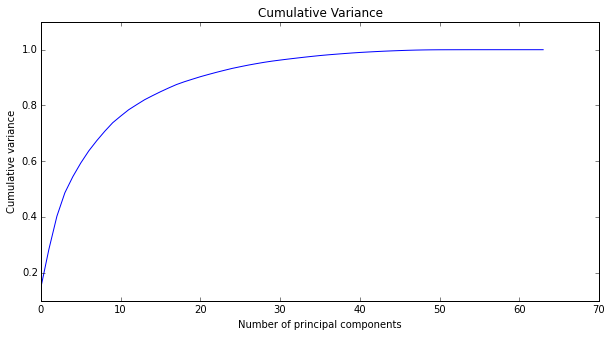

In [89]:
import matplotlib.pyplot as plt

cumulative_explained = np.cumsum(pca_digits.explained_variance_ratio_) 
plt.figure(figsize=(10,5))
plt.plot(cumulative_explained)
plt.ylabel('Cumulative variance')
plt.xlabel('Number of principal components')
plt.title('Cumulative Variance')

In [90]:
# Rerun the PCA with 30 components

X,y = digits.data, digits.target
pca_digits1=PCA(n_components = 30)

X_proj1 = pca_digits1.fit_transform(X)
print X.shape, X_proj1.shape

(1797, 64) (1797, 30)


In [91]:
X_inv_proj1 = pca_digits1.inverse_transform(X_proj1)

In [92]:
shape(X_inv_proj1)

(1797, 64)

In [93]:
X_proj_img1 = np.reshape(X_inv_proj1,(1797,8,8))

Shape of the matrix before applying PCA (1797, 64)
Shape of the matrix after applying PCA (1797, 30)
Variance captured by using 30 principal components =  95.91 %
Amount of information thrown away by applying PCA =  4.09 %


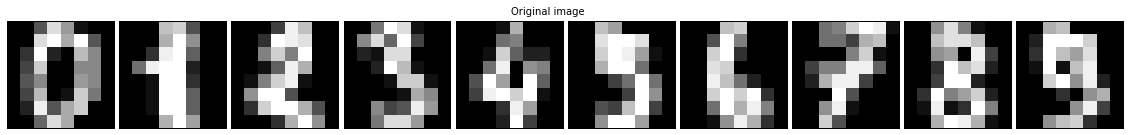

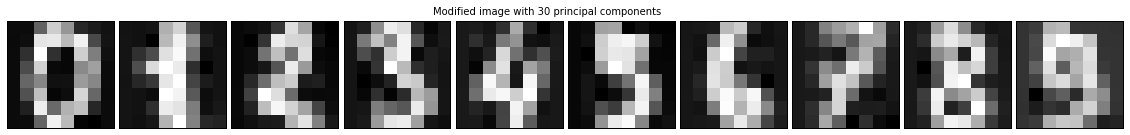

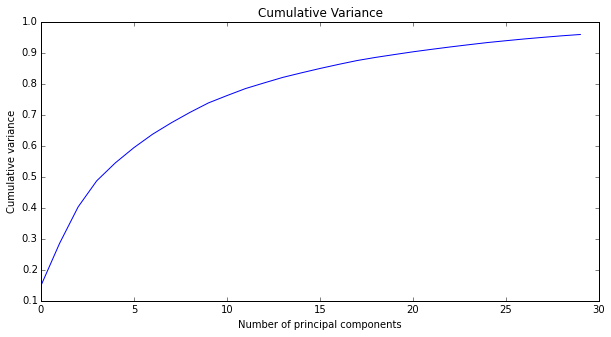

In [94]:
num_columns = 10
num_rows = 1

# Plot the original images
fig = plt.figure(figsize=(num_columns * 2, 2.0 * num_rows))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(num_columns * num_rows):
    ax = fig.add_subplot(num_rows, num_columns, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.suptitle('Original image')
    
# Plot the modified images    
fig = plt.figure(figsize=(num_columns * 2, 2.0 * num_rows))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(num_columns * num_rows):
    ax = fig.add_subplot(num_rows, num_columns, i + 1, xticks=[], yticks=[])
    ax.imshow(X_proj_img1[i], cmap=plt.cm.gray, interpolation='nearest')
    plt.suptitle('Modified image with 30 principal components')
    
# Shape of the matrices before and after application of PCA    
print 'Shape of the matrix before applying PCA', X.shape
print 'Shape of the matrix after applying PCA', X_proj1.shape    

# Cumulative variance graph
cumulative_explained1 = np.cumsum(pca_digits1.explained_variance_ratio_) 
plt.figure(figsize=(10,5))
plt.plot(cumulative_explained1)
plt.ylabel('Cumulative variance')
plt.xlabel('Number of principal components')
plt.title('Cumulative Variance')

# Calculate the amount of information thrown away
cumulative_explained1 = np.cumsum(pca_digits1.explained_variance_ratio_)
print 'Variance captured by using 30 principal components = ', round(cumulative_explained1.max()*100,2) , '%'    
print 'Amount of information thrown away by applying PCA = ', (100-round(cumulative_explained1.max()*100,2)) , '%'    


In [ ]:
# Try other dimensionality reduction techniques - sklearn.decomposition.RandomizedPCA, sklearn.decomposition.FastICA 
# as well (this extended analysis need not be submitted as part of homework)


To get to these coordinate on Google Maps, type the latitude and longitude in decimal in the search box or use: https://www.google.com/maps/place/72%C2%B018'00.0%22S+170%C2%B013'00.1%22E/@-72.3,170.216694,17z/data=!3m1!4b1!4m2!3m1!1s0x0:0x0


HW questions

Waiting for somebody to write a script that will do that automatically from python i.e write a script in python return the google maps url when passed with the latitude and longitudinal values of the place

Can you create a map where the denity of points is represented as a density map (topographical map)?

Can you create a map that would represent, using color, the values of a chosen column (Mean, Std, V0,V1 etc.)? What conclusions can you draw from this map?


### <font color = 'blue'> Impact of each parameter on the result </font>



## <font color = 'blue'> Conclusions from the map</font>
#### <font color = 'blue'>Mean graph clearly shows that the geographical locations closer to the equator have higher mean temperatures But as you go towars either poles, the mean temperatures start declining</font>
#### <font color = 'blue'>Standard deviation graph shows that the temperature deviation is lesser closer to the equators but increases as you go towards poles</font>
#### <font color = 'blue'>V0, V1 and V2 capture interesting patterns in the data which can be used to understand the principal categoies of temperature patterns pictorially</font>



In [95]:
# Waiting for somebody to write a script that will do that automatically from python i.e write a script in python 
# return the google maps url when passed with the latitude and longitudinal values of the place

import webbrowser


# The function below takes latitude and longitude as inputs and opens that point on google maps in a new tab
def open_gmap(lat,lon):
    url = "http://maps.google.com/?q=%s,%s" % (lat,lon)
    webbrowser.open(url)

    
## Input a valid latitude and longitude value below to open the google maps url    
open_gmap(12.9667,77.5667)


In [97]:

% cd ..


/Users/Deepthi/Documents/DSE/dmysoren


In [98]:
# Can you create a map where the denity of points is represented as a density map (topographical map)?

%cd DSE200/data/weather

# /Documents/DSE/dmysoren/DSE200/data/weather

/Users/Deepthi/Documents/DSE/dmysoren/DSE200/data/weather


In [99]:
ls

ALL.corrupted.csv            digits.png
ALL.head.csv                 ghcnd-readme.txt
SAMPLE_TMAX.csv              ghcnd-stations.txt
TMAX.10.csv                  ghcnd-stations_buffered.txt
TMAX.head.csv                ghcnd-version.txt
data-source.txt              make_covar.raw_256
digits.pdf                   weather_to_plot.csv


In [103]:
## Get data

out=open('ghcnd-stations_buffered.txt','w')
for line in open('ghcnd-stations.txt','r').readlines():
    line=line.rstrip()
    string=line+' '*(90-len(line))+'\n'
    out.write(string)
out.close()


In [104]:
## Create stations dataframe

import pandas as pd
colspecs = [(0, 11), (11, 21), (21, 31), (31, 38),(39,41),(41,72),(72,76),(76,80),(80,86)]
stations = pd.read_fwf('ghcnd-stations_buffered.txt', colspecs=colspecs, header=None, index_col=0,
                       names=['latitude','longitude','elevation','state','name','GSNFLAG','HCNFLAG','WMOID'])

In [105]:
stations.head()

,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196
AF000040930,35.3170,69.0170,3366.0,NaN,NORTH-SALANG,GSN,NaN,40930
AG000060390,36.7167,3.2500,24.0,NaN,ALGER-DAR EL BEIDA,GSN,NaN,60390


In [106]:
## Create required parameters to plot the map

lons=stations.ix[:,'longitude'].values
lats=stations.ix[:,'latitude'].values
elev=stations.ix[:,'elevation'].values
station_names=stations.index.values
ll=len(lons)
lonmin=-180;lonmax=180;latsmin=-80;latsmax=80;
select=(lons>lonmin) * (lons<lonmax)*(lats>latsmin)*(lats<latsmax)
print sum(select)
station_names=station_names[select]
lons=lons[select]
lats=lats[select]
print len(lons),len(lats),len(station_names)

85273
85273 85273 85273


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


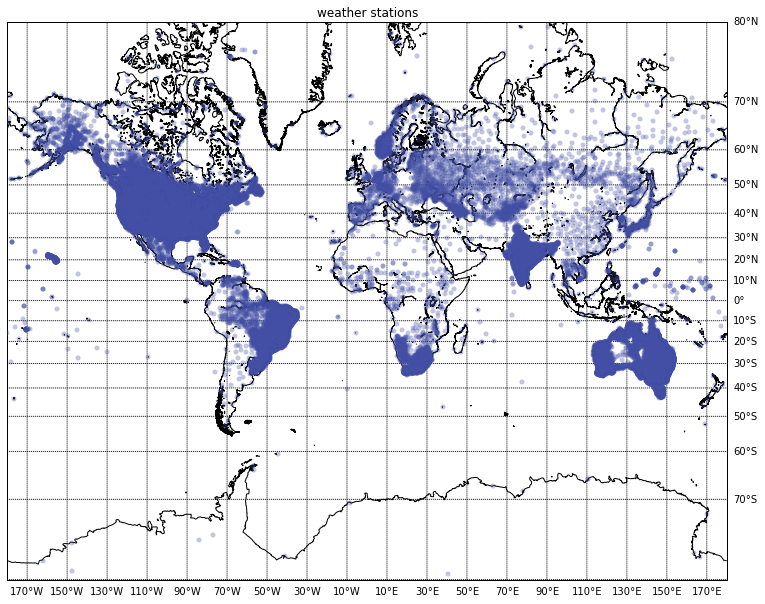

In [107]:
# Can you create a map where the denity of points is represented as a density map (topographical map)?

## I have taken two approaches to this question:
## 1. Assuming that density map implies density of stations on the map, 
##    I have plotted all the points using translucent markers. Hence when the stations are denser, the colors are darker.
##    When stations are sparsely distributed, the color is lighter.
## 2. Plotted the elevation as density map. But in this case, I have used different colors to show different values


## This is using approach 1. 
## 1. Assuming that density map implies density of stations on the map, 
##    I have plotted all the points using translucent markers. Hence when the stations are denser, the colors are darker.
##    When stations are sparsely distributed, the color is lighter.

from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%pylab inline

plt.figure(figsize=(15,10),dpi=300)
m = Basemap(projection='merc',llcrnrlat=latsmin,urcrnrlat=latsmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=20,resolution='i')
m.drawcoastlines()

# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

x,y = m(lons, lats)

m.plot(x, y, 'o', markersize=5,zorder=6, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.33)

plt.title('weather stations')

plt.show()

Populating the interactive namespace from numpy and matplotlib


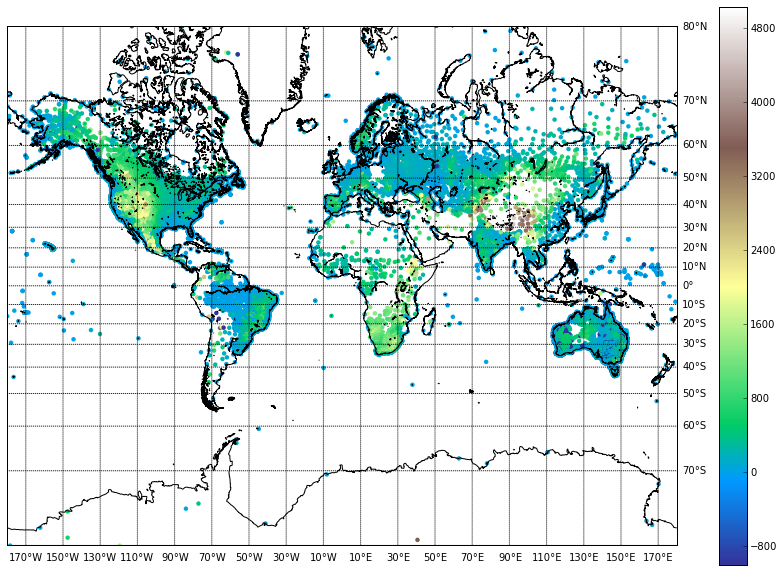

In [108]:
## This is using approach 2.
## 2. Plotted the elevation as density map. But in this case, I have used different colors to show different values


from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%pylab inline

lons=stations.ix[:,'longitude'].values
lats=stations.ix[:,'latitude'].values
elev=stations.ix[:,'elevation'].values

plt.figure(figsize=(15,10),dpi=300)
m = Basemap(projection='merc',llcrnrlat=latsmin,urcrnrlat=latsmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=20,resolution='i')
m.drawcoastlines()

# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

xpt,ypt = m(lons, lats)

plt.scatter(xpt,ypt,c=elev,s=20,edgecolor = '',cmap='terrain')

plt.colorbar()

plt.show()

In [110]:
# Can you create a map that would represent, using color, the values of a chosen column (Mean, Std, V0,V1 etc.)? 
# What conclusions can you draw from this map?

weather_to_plot = pd.read_csv('weather_to_plot.csv')

weather_to_plot = weather_to_plot[['station','latitude','longitude','Mean','Std','V0','V1','V2']]

Populating the interactive namespace from numpy and matplotlib


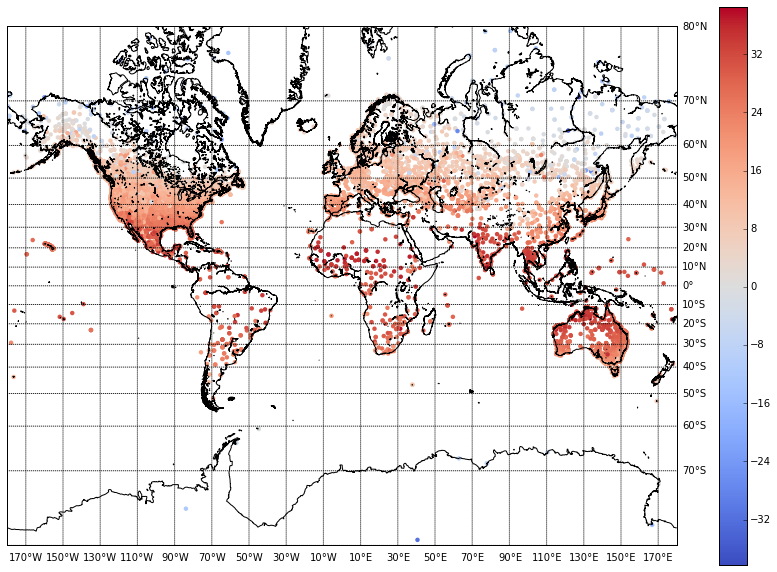

In [140]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%pylab inline

lons=weather_to_plot.ix[:,'longitude'].values
lats=weather_to_plot.ix[:,'latitude'].values

def plot_req_field(pf):
    plot_field=weather_to_plot.ix[:,pf].values
    plt.figure(figsize=(15,10),dpi=300)
    m = Basemap(projection='merc',llcrnrlat=latsmin,urcrnrlat=latsmax,\
                llcrnrlon=lonmin,urcrnrlon=lonmax,lat_ts=20,resolution='i')
    m.drawcoastlines()
    # draw parallels and meridians.
    parallels = np.arange(-80,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])
    xpt,ypt = m(lons, lats)
    plt.scatter(xpt,ypt,c=plot_field,s=20,edgecolor = '',cmap='coolwarm')
    plt.colorbar()
    plt.show()

    
# Input any of the following to plot in the map ('Mean','Std','V0','V1','V2')    
plot_req_field('Mean')


# What conclusions can you draw from this map? (I have also provided the explanation in the markdown)

## Mean graph clearly shows that the geographical locations closer to the equator have higher mean temperatures 
## But as you go towars either poles, the mean temperatures start declining

## Standard deviation graph shows that the temperature deviation is lesser closer to the equators 
## but increases as you go towards poles

## V0, V1 and V2 capture interesting patterns in the data which can be used to understand the principal categoies of 
## temperature patterns pictorially
